In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime,timedelta

In [166]:
customer_acq=pd.read_csv('Customer Acqusition.csv')
customer_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [167]:
customer_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [168]:
spend=pd.read_csv('spend.csv')
spend.head(10)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
5,6,A1,23-Feb-05,SANDALS,168285.60
6,7,A1,1-Feb-05,CAR,23370.20
7,8,A8,5-Feb-04,BIKE,155562.58
8,9,A9,28-Feb-05,AUTO,38269.94
9,10,A10,16-Feb-05,SHOPPING,194795.88


In [169]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [170]:
spend['Month']=spend['Month'].apply(lambda x:pd.to_datetime(x))

In [171]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13


In [172]:
Repayment=pd.read_csv('Repayment.csv')
Repayment.head(10)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
5,6.0,A1,23-Feb-05,365366.62,NaN
6,7.0,A1,1-Feb-05,14473.41,NaN
7,8.0,A8,5-Feb-04,156913.59,NaN
8,9.0,A9,28-Feb-05,417294.81,NaN
9,10.0,A10,16-Feb-05,48759.19,NaN


In [173]:
Repayment.drop(['Unnamed: 4','SL No:'],axis=1,inplace=True)# drop the column contain missing values


In [174]:
Repayment.dropna(axis=0,inplace=True)# drop the row that contain missing values


In [175]:
Repayment.head(10)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
5,A1,23-Feb-05,365366.62
6,A1,1-Feb-05,14473.41
7,A8,5-Feb-04,156913.59
8,A9,28-Feb-05,417294.81
9,A10,16-Feb-05,48759.19


In [176]:
Repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 46.9+ KB


In [177]:
Repayment['Month']=Repayment['Month'].apply(lambda x:pd.to_datetime(x))

In [178]:
Repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


In [179]:
Repayment.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


### 1a. In case age is less than 18, replace it with mean of age values.


In [180]:
customer_acq.loc[customer_acq['Age']<18,'Age']=customer_acq['Age'].mean()
customer_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


### 1b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [181]:
# merge the data set
cust_spend=pd.merge(left=customer_acq,right=spend,on='Customer')

In [182]:
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13


In [183]:
lim=0.50*cust_spend.Limit

In [184]:
cust_spend.loc[cust_spend['Amount']>cust_spend['Limit'],['Amount','Limit']] =lim
cust_spend.head(10)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,2005-02-23,SANDALS,168285.60
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,2005-02-01,CAR,23370.20
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,2004-01-12,TRAIN TICKET,440563.22
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117,2004-02-05,BUS TICKET,52208.65
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,2006-04-19,AIR TICKET,346925.68


### 1 c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [185]:
cust_repay = pd.merge(left = customer_acq,
               right = Repayment,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner')

cust_repay.loc[cust_repay['Amount']>cust_repay['Limit'],['Amount','Limit']] = cust_repay.Limit
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


### 2. From the above dataset create the following summaries:
#### a. How many distinct customers exist?




In [186]:
cust_spend.Customer.nunique()

100

### b. How many distinct categories exist?


In [187]:
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13


In [188]:
print('Distinct Categories are :')
print('Product',cust_spend.Product.nunique())
print('Segment',cust_spend.Segment.nunique())

Distinct Categories are :
Product 3
Segment 5


In [189]:
cust_spend['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

In [190]:
cust_repay['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

### c. What is the average monthly spend by customers?

In [195]:
cust_monthly_spend=cust_spend.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [196]:
cust_monthly_spend['Spend_Month']=cust_monthly_spend['Month'].apply(lambda x:x.month)

In [197]:
Avg_Monthly_Spend=cust_monthly_spend.groupby(['Customer','Spend_Month'])[['Amount']].mean().reset_index()

In [199]:
Avg_Monthly_Spend

,Customer,Spend_Month,Amount
0,A1,1,341332.87700
1,A1,2,138421.15125
2,A1,4,261649.25000
3,A1,5,361141.31000
4,A1,8,344372.10000
...,...,...,...
573,A95,1,240401.50000
574,A96,1,54729.66000
575,A97,1,5000.00000
576,A98,1,5000.50000


### d. What is the average monthly repayment by customers?


In [200]:
cust_montly_repay=cust_repay.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [201]:
cust_montly_repay['Repayment_Month']=cust_montly_repay['Month'].apply(lambda x:x.month)

In [202]:
Avg_Monthly_Repayment=cust_montly_repay.groupby(['Customer','Repayment_Month'])[['Amount']].mean().reset_index()

In [203]:
Avg_Monthly_Repayment.head(20)

,Customer,Repayment_Month,Amount
0,A1,1,325723.331000
1,A1,2,137713.785000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000
5,A1,11,285729.090000
6,A10,1,283324.721667
7,A10,2,217344.503333
8,A10,3,240130.543333
9,A10,4,120467.322500


 ### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [204]:
Monthly_profit=pd.merge(left=Avg_Monthly_Spend,right=Avg_Monthly_Repayment,left_on=['Customer','Spend_Month'],right_on=['Customer','Repayment_Month'])
Monthly_profit

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y
0,A1,1,341332.87700,1,325723.331000
1,A1,2,138421.15125,2,137713.785000
2,A1,4,261649.25000,4,254474.580000
3,A1,11,183839.61000,11,285729.090000
4,A10,1,173828.28250,1,283324.721667
...,...,...,...,...,...
449,A95,1,240401.50000,1,369405.960000
450,A96,1,54729.66000,1,100000.000000
451,A97,1,5000.00000,1,10000.000000
452,A98,1,5000.50000,1,10001.000000


In [205]:
Monthly_profit['profit']=Monthly_profit.Amount_y-Monthly_profit.Amount_x

In [206]:
Monthly_profit['Profit']=np.where(Monthly_profit['profit']>0,Monthly_profit['profit']*2.9/100,np.nan)

In [207]:
Monthly_profit.head(5)

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y,profit,Profit
0,A1,1,341332.87700,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.15125,2,137713.785000,-707.366250,NaN
2,A1,4,261649.25000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.61000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.28250,1,283324.721667,109496.439167,3175.396736


### f. What are the top 5 product types?

In [208]:
Top_5 = cust_spend.groupby('Type').sum().sort_values("Amount",ascending = False).head(5)
t = (Top_5).reset_index()
display(t)

,Type,No,Age,Limit,Sl No:,Amount
0,PETRO,6504,8949.92,54065078.5,146920,28597384.98
1,CAMERA,5298,7735.41,51815051.0,113612,27690738.44
2,FOOD,4912,7535.94,43285068.0,110164,20519243.60
3,AIR TICKET,5855,6555.41,42845053.0,117877,20155847.12
4,TRAIN TICKET,3968,5604.45,37440043.5,90087,19995825.72


 ### g. Which city is having maximum spend?


In [209]:
Max_spent=cust_repay.groupby('City')['Amount'].sum()
Max_spent.nlargest(1)

City
COCHIN    50702815.75
Name: Amount, dtype: float64

### h. Which age group is spending more money?


In [210]:
Max_spent_age=cust_repay.groupby('Age')['Amount'].sum()
Max_spent_age.nlargest(1)

Age
28.0    17931020.86
Name: Amount, dtype: float64

### i. Who are the top 10 customers in terms of repayment?

In [211]:
Top_cust=cust_repay.groupby('Customer')['Amount'].sum()
Top_cust.nlargest(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [213]:
cust_spend['Yearly_Spend']=cust_spend['Month'].apply(lambda x:x.year)

In [214]:
City_Wise_Spend = pd.pivot_table(data = cust_spend, index = 'City', columns=['Product','Yearly_Spend'], 
               values='Amount', aggfunc='sum')

In [215]:
City_Wise_Spend

Product             Gold                              Platimum              \
Yearly_Spend        2004         2005         2006        2004        2005   
City                                                                         
BANGALORE     9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY        6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA      7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI       1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN        7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI         2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA         2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM    2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                       Silver                         
Yearly_Spend        2006        2004       2005        2006  
City                                                         
BANGALORE      685831.27  1291852.58  830612.34  1415480.94  
BOMBAY         972130.01   532089.03  508988.54  1092833.80  
CALCUTTA      3589606.66   500006.00  440147.06  1157956.42  
CHENNAI       5024923.40   282056.86  377184.49   350009.50  
COCHIN        4920592.29   814229.62  652269.38  1269990.87  
DELHI          176788.72   768172.30  612311.21   854899.97  
PATNA         1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM    2147403.75   209667.48  269912.99   555862.12

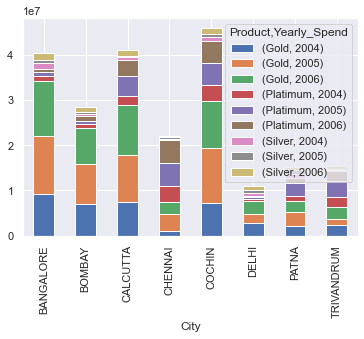

In [217]:
City_Wise_Spend.plot(kind='bar',stacked=True)
plt.show()

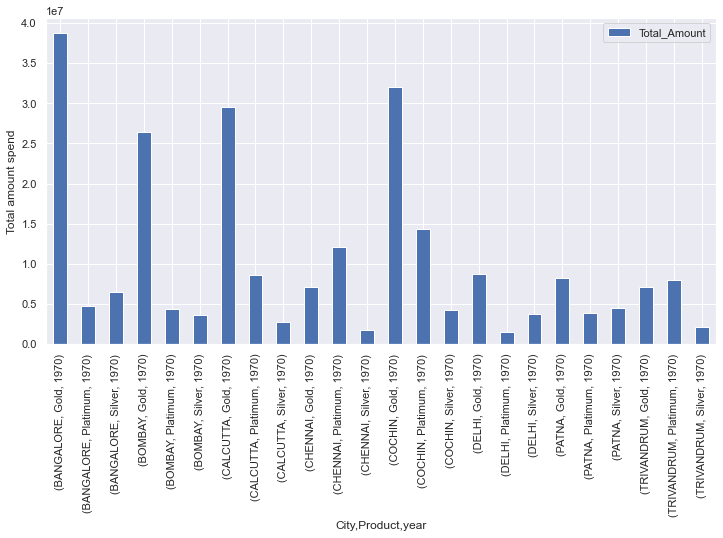

### 4. Create graphs for

### a. Monthly comparison of total spends, city wise


In [219]:
cust_spend['Monthly_Spend']=cust_spend.Month.apply(lambda x:x.year)


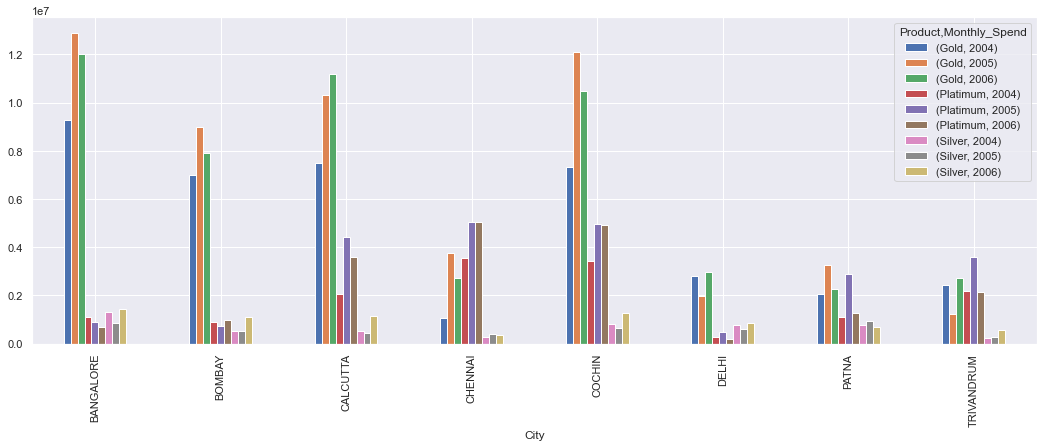

In [222]:
Monthly_spend=pd.pivot_table(cust_spend, index ='City',columns =['Product','Monthly_Spend'],values="Amount",aggfunc='sum').plot(kind='bar',figsize=(18,6))
#Monthly_spend.plot(kind='bar',stacked=True)
plt.show()

In [23]:
### b. Comparison of yearly spend on air tickets

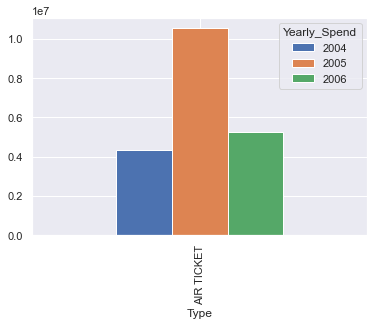

In [223]:
pd.pivot_table(data = cust_spend[cust_spend.Type=='AIR TICKET'], index = 'Type', columns='Yearly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


<AxesSubplot:xlabel='Product'>

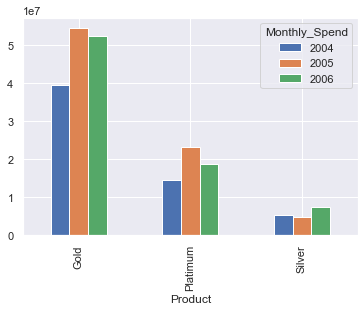

In [224]:
pd.pivot_table(data = cust_spend, index = 'Product', columns='Monthly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar')

### 5. Write user defined PYTHON function to perform the following analysis:You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [263]:
cust_repay['yearly']=cust_repay.Month.apply(lambda x:x.year)
cust_repay['monthly']=cust_repay.Month.apply(lambda x:x.month)

In [264]:
cust_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,year,yearly,monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,1970,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,1970,2004,1


In [265]:
def top10Customers(product_name,time_period):
    return cust_repay.loc[(cust_repay.Product == product_name)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [266]:
product_name=str(input("Please Enter Product Name and  should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter  time period  and should be in yearly/monthly: "))

Please Enter Product Name and  should be in Gold/Silver/Platinum: Silver
Please Enter  time period  and should be in yearly/monthly: monthly


In [267]:
top_cust=top10Customers(product_name,time_period)

In [268]:
top_cust

,Customer,City,Product,monthly,Amount
16,A22,BOMBAY,Silver,1,900000.00
57,A46,PATNA,Silver,1,713614.32
107,A8,PATNA,Silver,1,600012.00
85,A6,DELHI,Silver,1,600000.00
3,A18,BANGALORE,Silver,3,600000.00
93,A7,COCHIN,Silver,1,594009.28
47,A25,COCHIN,Silver,1,586332.08
67,A57,TRIVANDRUM,Silver,3,578549.42
51,A25,COCHIN,Silver,5,572616.74
58,A46,PATNA,Silver,2,544231.79
